# Car Price Prediction

### Goal: Predict the selling price of a car based on features. Understand regression models and compare their performance. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [14]:
df1 = pd.read_csv(r"C:\Users\varun\Desktop\b tech\sem 7\DVT\preprocessed_cars_sale_data.csv")
df1.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225,18,24,3880,115,197


#### Data is already preprocessed 

#### 1. Vsiualizations of target varibles
* taget varible: MSRP
* featuers: 

In [4]:
print("Shape of dataset: ",df1.shape)
print(df1.info())

Shape of dataset:  (428, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    float64
 6   Invoice      428 non-null    float64
 7   EngineSize   428 non-null    float64
 8   Cylinders    428 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 50.3+ KB
None


In [8]:
print("Number of missing values:\n", df1.isnull().sum())

Number of missing values:
 Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


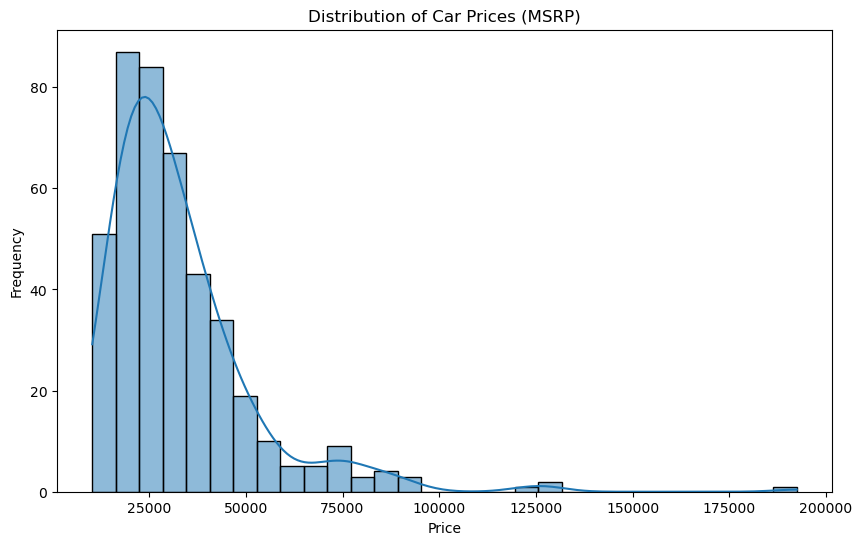

In [9]:
# Histogram to show distribution of car price
plt.figure(figsize=(10,6))
sns.histplot(df1['MSRP'],bins=30, kde=True)
plt.title('Distribution of Car Prices (MSRP)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Encoding the categorical varibles
df1 = pd.get_dummies(df1, columns=['Make', 'Model', 'Type', 'Origin', 'DriveTrain'], drop_first=True)
#Split data
X = df1.drop(columns=['MSRP'])
y = df1['MSRP']
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# Train the 3 models
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)


gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [19]:
# Model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse,mae,r2

In [20]:
# Evaluate
models = {'Linear Regression': lin_reg, 'Random Forest': rf_reg, 'Gradient Boosting': gb_reg}
for name, model in models.items():
    mse, mae, r2 = evaluate_model(model, X_test, y_test)
    print(f"{name} Performance:\n MSE: {mse}, MAE: {mae}, R-squared: {r2}\n")

Linear Regression Performance:
 MSE: 38585035.76583, MAE: 4711.498692782444, R-squared: 0.8852494068707508

Random Forest Performance:
 MSE: 1055435.7990023245, MAE: 562.3539534883721, R-squared: 0.9968611695818975

Gradient Boosting Performance:
 MSE: 600965.9176846811, MAE: 526.1744806873389, R-squared: 0.9982127476588774



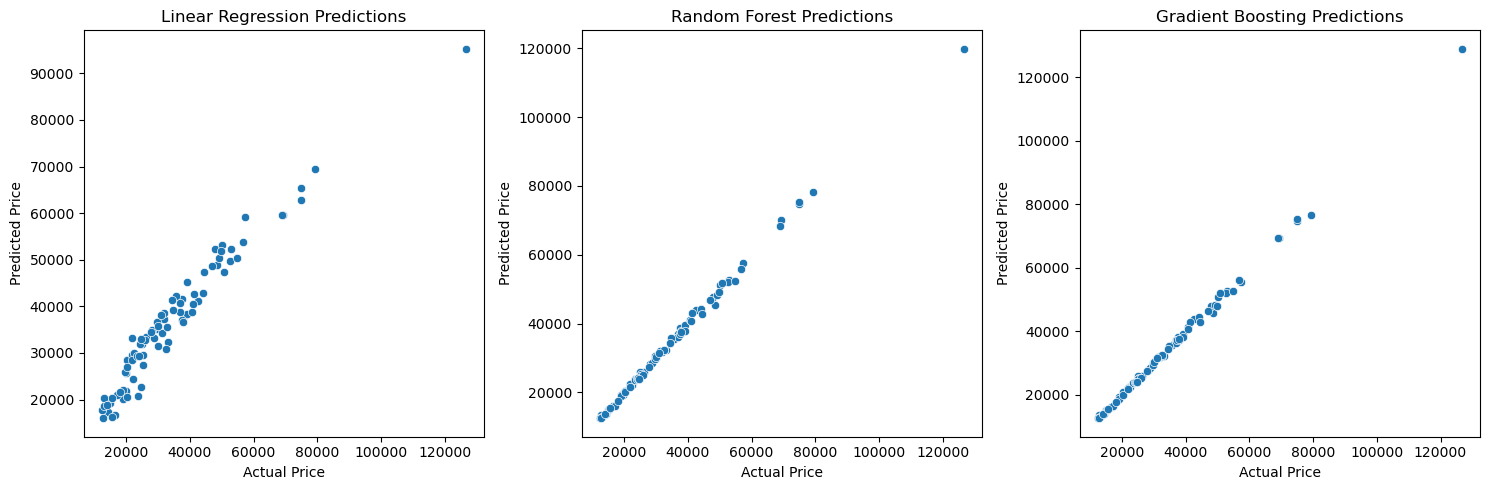

In [21]:
# Plotting predicted vs. actual prices
plt.figure(figsize=(15, 5))
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{name} Predictions')
plt.tight_layout()
plt.show()


In [24]:
# Sample new data with values as per the features (dummy values as per data)
new_data = pd.DataFrame([[3.5, 6, 240, 18, 25, 3500, 105, 190]], 
                        columns=['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length'])

# This will encode and reindex the dummy data
new_data = pd.get_dummies(new_data).reindex(columns=X.columns, fill_value=0)

# Scale the dummy data
new_data_scaled = scaler.transform(new_data)

# Predict with each model
print("Predictions for new data:")
print("Linear Regression Prediction:", lin_reg.predict(new_data_scaled)[0])
print("Random Forest Prediction:", rf_reg.predict(new_data_scaled)[0])
print("Gradient Boosting Prediction:", gb_reg.predict(new_data_scaled)[0])


Predictions for new data:
Linear Regression Prediction: 28115.36234412559
Random Forest Prediction: 11063.87
Gradient Boosting Prediction: 11390.23559962659


# Conclution

### We find out that gradient boosting performs well as compared to linear regressor and random forest regressor.